In [1]:
import json
import numpy as np
import pandas as pd


In [167]:
# Read all the data sets

set1_human = pd.read_json('dataset/set1_human.json')
set1_machine = pd.read_json('dataset/set1_machine.json')
set2_human = pd.read_json('dataset/set2_human.json')
set2_machine = pd.read_json('dataset/set2_machine.json')
set_test = pd.read_json('dataset/test.json')

# Add in label for all data sets
set1_human = set1_human.assign(label=1)
set2_human = set2_human.assign(label=1)
set1_machine = set1_machine.assign(label=0)
set2_machine = set2_machine.assign(label=0)

KeyboardInterrupt: 

In [358]:
# Separate and concatenate into 2 sets, set 1 and set 2
set1 = pd.concat([set1_human[:3500], set1_machine])
set2 = pd.concat([set2_human, set2_machine[300:]])

# Split the labels and the data for training
x_set1 = pd.DataFrame(set1[['txt', 'prompt']])
y_set1 = pd.DataFrame(set1[['label']])
x_set2 = pd.DataFrame(set2[['txt', 'prompt']])
y_set2 = pd.DataFrame(set2[['label']])

In [359]:
y_set2

,label
0,1
1,1
2,1
3,1
4,1
...,...
395,0
396,0
397,0
398,0


In [360]:
#import imblearn
#from imblearn.over_sampling import RandomOverSampler

#oversample = RandomOverSampler(sampling_strategy=1)

#x_over, y_over = oversample.fit_resample(x_set2, y_set2)

In [361]:
x_set1['prompt_len'] = x_set1['prompt'].apply(lambda x: len(x))
x_set1['txt_len'] = x_set1['txt'].apply(lambda x: len(x))

x_set2['prompt_len'] = x_set2['prompt'].apply(lambda x: len(x))
x_set2['txt_len'] = x_set2['txt'].apply(lambda x: len(x))

In [362]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_set1[['prompt_len', 'txt_len']] = scaler.fit_transform(x_set1[['prompt_len', 'txt_len']])
x_set2[['prompt_len', 'txt_len']] = scaler.transform(x_set2[['prompt_len', 'txt_len']])

In [363]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.decomposition import PCA

def preprocess(x_set):
    
    x_set['txt'] = x_set['txt'].apply(lambda x: ' '.join(map(str, x)))
    vectorizer = TfidfVectorizer()
    vectorized_words = vectorizer.fit_transform(x_set['txt'])
    x_set_vectorized = pd.DataFrame(vectorized_words.toarray())
    #new_x_set = np.concatenate((x_set_vectorized,  x_set[['txt_len']]), axis=1)
    return x_set_vectorized

In [364]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix


def predict(classifier, x_set_train, y_set_train, x_set_test, y_set_test):
    classifier.fit(x_set_train, y_set_train)

    y_pred = classifier.predict(x_set_test)
    accuracy = accuracy_score(y_set_test, y_pred)
    
    print(classification_report(y_pred, y_set_test))
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_set_test, y_pred))
    cm_display.plot();
    
    return



/home/jiaming/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.84      0.85      0.84       693
           1       0.85      0.84      0.84       707

    accuracy                           0.84      1400
   macro avg       0.84      0.84      0.84      1400
weighted avg       0.84      0.84      0.84      1400



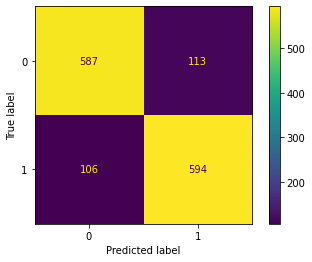

In [365]:
new_x_set1 = preprocess(x_set1)
x_set1_train, x_set1_test, y_set1_train, y_set1_test= train_test_split(new_x_set1, y_set1, test_size=0.2, stratify=y_set1)
predict(LogisticRegression(), x_set1_train, y_set1_train, x_set1_test,  y_set1_test)

/home/jiaming/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.80      0.62      0.70        26
           1       0.50      0.71      0.59        14

    accuracy                           0.65        40
   macro avg       0.65      0.66      0.64        40
weighted avg       0.70      0.65      0.66        40



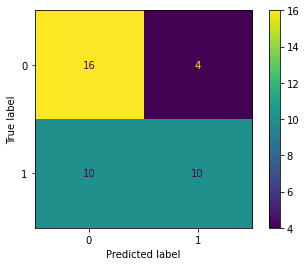

In [366]:
new_x_set2 = preprocess(x_set2)
x_set2_train, x_set2_test, y_set2_train, y_set2_test= train_test_split(new_x_set2, y_set2, test_size=0.2, stratify=y_set2)
predict(LogisticRegression(), x_set2_train, y_set2_train, x_set2_test, y_set2_test)

In [367]:
y_set2

,label
0,1
1,1
2,1
3,1
4,1
...,...
395,0
396,0
397,0
398,0


In [368]:
x_set1 = pd.concat([set1, set_test[:600]])
new_x_set1 = preprocess(x_set1)
x_set1_train = new_x_set1[:7000]
x_set1_test = new_x_set1[7000:]
classifier = LogisticRegression()
classifier.fit(x_set1_train, y_set1)
y_pred1 = classifier.predict(x_set1_test)

/home/jiaming/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [369]:
x_set2 = pd.concat([set2, set_test[600:]])
new_x_set2 = preprocess(x_set2)
x_set2_train = new_x_set2[:200]
x_set2_test = new_x_set2[200:]
classifier = LogisticRegression()
classifier.fit(x_set2_train, y_set2)
y_pred2 = (classifier.predict(x_set2_test))

/home/jiaming/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [370]:
y_pred1

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,

In [371]:
y_pred2

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,

In [377]:
count = 0
for i in y_pred1:
    if i == 0:
        count+=1
count

342

In [373]:
y_pred = np. concatenate((y_pred1, y_pred2))

In [374]:
df = pd.DataFrame(y_pred, columns = ['Predicted'])

In [375]:
df

,Predicted
0,1
1,0
2,1
3,1
4,0
...,...
995,1
996,0
997,0
998,0


In [376]:
df.to_csv('out.csv')